# Introduction

World Health Organization has estimated 12 million deaths occur worldwide, every year due to Heart diseases. Half the deaths in the United States and other developed countries are due to cardio vascular diseases. The early prognosis of cardiovascular diseases can aid in making decisions on lifestyle changes in high risk patients and in turn reduce the complications. This research intends to pinpoint the most relevant/risk factors of heart disease as well as predict the overall risk using logistic regression
Data Preparation

# Dataset

Source
The dataset is publically available on the Kaggle website, and it is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has 10-year risk of future coronary heart disease (CHD).The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes.


# Variables

Demographic:
- Sex: male or female(Nominal)
- Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)
Behavioral
- Current Smoker: whether or not the patient is a current smoker (Nominal)
- Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)
Medical( history)
- BP Meds: whether or not the patient was on blood pressure medication (Nominal)
- Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)
- Prevalent Hyp: whether or not the patient was hypertensive (Nominal)
- Diabetes: whether or not the patient had diabetes (Nominal)
Medical(current)
- Tot Chol: total cholesterol level (Continuous)
- Sys BP: systolic blood pressure (Continuous)
- Dia BP: diastolic blood pressure (Continuous)
- BMI: Body Mass Index (Continuous)
- Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)
- Glucose: glucose level (Continuous)
Predict variable (desired target)
- 10 year risk of coronary heart disease CHD (binary: “1”, means “Yes”, “0” means “No”)

In [177]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('./framingham.csv')
df.head()

male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0     0.0                0   
1     0   46        2.0              0         0.0     0.0                0   
2     1   48        1.0              1        20.0     0.0                0   
3     0   61        3.0              1        30.0     0.0                0   
4     0   46        3.0              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  
0           0  
1           0  
2           0  
3           1  
4           0

In [178]:
# Getting basic information
df.describe()

male          age    education  currentSmoker   cigsPerDay  \
count  4238.000000  4238.000000  4133.000000    4238.000000  4209.000000   
mean      0.429212    49.584946     1.978950       0.494101     9.003089   
std       0.495022     8.572160     1.019791       0.500024    11.920094   
min       0.000000    32.000000     1.000000       0.000000     0.000000   
25%       0.000000    42.000000     1.000000       0.000000     0.000000   
50%       0.000000    49.000000     2.000000       0.000000     0.000000   
75%       1.000000    56.000000     3.000000       1.000000    20.000000   
max       1.000000    70.000000     4.000000       1.000000    70.000000   

            BPMeds  prevalentStroke  prevalentHyp     diabetes      totChol  \
count  4185.000000      4238.000000   4238.000000  4238.000000  4188.000000   
mean      0.029630         0.005899      0.310524     0.025720   236.721585   
std       0.169584         0.076587      0.462763     0.158316    44.590334   
min       0.000000         0.000000      0.000000     0.000000   107.000000   
25%       0.000000         0.000000      0.000000     0.000000   206.000000   
50%       0.000000         0.000000      0.000000     0.000000   234.000000   
75%       0.000000         0.000000      1.000000     0.000000   263.000000   
max       1.000000         1.000000      1.000000     1.000000   696.000000   

             sysBP        diaBP          BMI    heartRate      glucose  \
count  4238.000000  4238.000000  4219.000000  4237.000000  3850.000000   
mean    132.352407    82.893464    25.802008    75.878924    81.966753   
std      22.038097    11.910850     4.080111    12.026596    23.959998   
min      83.500000    48.000000    15.540000    44.000000    40.000000   
25%     117.000000    75.000000    23.070000    68.000000    71.000000   
50%     128.000000    82.000000    25.400000    75.000000    78.000000   
75%     144.000000    89.875000    28.040000    83.000000    87.000000   
max     295.000000   142.500000    56.800000   143.000000   394.000000   

        TenYearCHD  
count  4238.000000  
mean      0.151958  
std       0.359023  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max       1.000000

In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


# Preprocessing

In [180]:
# Preprocessing
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [181]:
df = df.drop(columns=['education'])
df.isnull().sum()

male                 0
age                  0
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [182]:
# Cleaning null values and attempt to replace them using mean or median
cigsPerDay_median = df['cigsPerDay'].median()
cigsPerDay_mean = df['cigsPerDay'].mean()
cigsPerDay_mode = df['cigsPerDay'].mode()

# There are outliers because the mean is largely greater than the median
print("Mean:", cigsPerDay_mean)
print("Median:", cigsPerDay_median)
print("Mode:", cigsPerDay_mode)

# Replace null values with median instead
df['cigsPerDay'] = df['cigsPerDay'].fillna(cigsPerDay_median)

Mean: 9.003088619624615
Median: 0.0
Mode: 0    0.0
Name: cigsPerDay, dtype: float64


In [183]:
# Repeat process for other columns with null values
# Cleaning null values and attempt to replace them using mean or median
BPMeds_median = df['BPMeds'].median()
BPMeds_mean = df['BPMeds'].mean()
BPMeds_mode = df['BPMeds'].mode()

# There are outliers because the mean is largely greater than the median
print("Mean:", BPMeds_mean)
print("Median:", BPMeds_median)
print("Mode:", BPMeds_mode)

# Replace null values with median because mean is closer to 0 than 1
df['BPMeds'] = df['BPMeds'].fillna(BPMeds_median)

Mean: 0.02962962962962963
Median: 0.0
Mode: 0    0.0
Name: BPMeds, dtype: float64


In [184]:
# Cleaning null values and attempt to replace them using mean or median
totChol_median = df['totChol'].median()
totChol_mean = df['totChol'].mean()
totChol_mode = df['totChol'].mode()

# In this case it makes sense to use the mean because the Mode is 240
print("Mean:", totChol_mean)
print("Median:", totChol_median)
print("Mode:", totChol_mode)

# Replace null values with median instead
df['totChol'] = df['totChol'].fillna(round(totChol_mean))

Mean: 236.72158548233045
Median: 234.0
Mode: 0    240.0
Name: totChol, dtype: float64


In [185]:
# Cleaning null values and attempt to replace them using mean or median
BMI_median = df['BMI'].median()
BMI_mean = df['BMI'].mean()
BMI_mode = df['BMI'].mode()

# There are outliers if the mean is largely greater than the median
print("Mean:", BMI_mean)
print("Median:", BMI_median)
print("Mode:", BMI_mode)

# Replace null values with median instead
df['BMI'] = df['BMI'].fillna(round(BMI_median))

Mean: 25.80200758473572
Median: 25.4
Mode: 0    22.19
1    22.54
2    22.91
3    23.48
Name: BMI, dtype: float64


In [186]:
# Cleaning null values and attempt to replace them using mean or median
heartRate_median = df['heartRate'].median()
heartRate_mean = df['heartRate'].mean()
heartRate_mode = df['heartRate'].mode()

# There are outliers if the mean is largely greater than the median
print("Mean:", heartRate_mean)
print("Median:", heartRate_median)
print("Mode:", heartRate_mode)

# Replace null values with median instead
df['heartRate'] = df['heartRate'].fillna(round(heartRate_median))

Mean: 75.87892376681614
Median: 75.0
Mode: 0    75.0
Name: heartRate, dtype: float64


In [187]:
# Cleaning null values and attempt to replace them using mean or median
glucose_median = df['glucose'].median()
glucose_mean = df['glucose'].mean()
glucose_mode = df['glucose'].mode()

# There are outliers if the mean is largely greater than the median
print("Mean:", glucose_mean)
print("Median:", glucose_median)
print("Mode:", glucose_mode)

# Replace null values with median instead
df['glucose'] = df['glucose'].fillna(round(glucose_mean))

Mean: 81.96675324675324
Median: 78.0
Mode: 0    75.0
Name: glucose, dtype: float64


In [188]:
# Data is all clean!
df.isnull().sum()

male               0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [189]:
# Find outliers
df.describe()

male          age  currentSmoker   cigsPerDay       BPMeds  \
count  4238.000000  4238.000000    4238.000000  4238.000000  4238.000000   
mean      0.429212    49.584946       0.494101     8.941482     0.029259   
std       0.495022     8.572160       0.500024    11.902399     0.168552   
min       0.000000    32.000000       0.000000     0.000000     0.000000   
25%       0.000000    42.000000       0.000000     0.000000     0.000000   
50%       0.000000    49.000000       0.000000     0.000000     0.000000   
75%       1.000000    56.000000       1.000000    20.000000     0.000000   
max       1.000000    70.000000       1.000000    70.000000     1.000000   

       prevalentStroke  prevalentHyp     diabetes      totChol        sysBP  \
count      4238.000000   4238.000000  4238.000000  4238.000000  4238.000000   
mean          0.005899      0.310524     0.025720   236.724870   132.352407   
std           0.076587      0.462763     0.158316    44.326463    22.038097   
min           0.000000      0.000000     0.000000   107.000000    83.500000   
25%           0.000000      0.000000     0.000000   206.000000   117.000000   
50%           0.000000      0.000000     0.000000   234.000000   128.000000   
75%           0.000000      1.000000     0.000000   262.000000   144.000000   
max           1.000000      1.000000     1.000000   696.000000   295.000000   

             diaBP          BMI    heartRate      glucose   TenYearCHD  
count  4238.000000  4238.000000  4238.000000  4238.000000  4238.000000  
mean     82.893464    25.798412    75.878716    81.969797     0.151958  
std      11.910850     4.071305    12.025185    22.836605     0.359023  
min      48.000000    15.540000    44.000000    40.000000     0.000000  
25%      75.000000    23.080000    68.000000    72.000000     0.000000  
50%      82.000000    25.380000    75.000000    80.000000     0.000000  
75%      89.875000    28.037500    83.000000    85.000000     0.000000  
max     142.500000    56.800000   143.000000   394.000000     1.000000

Has Outliers (Based on mean and max):
- cigsPerDay
- glucose
- totChol(?)

### Outliers for CigsPerday

<AxesSubplot: >

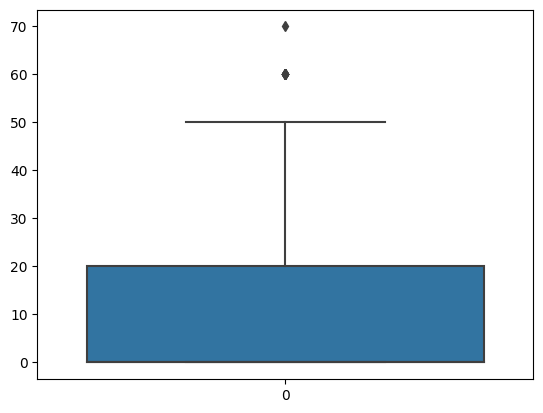

In [190]:
# Plot cigs per day
sns.boxplot(data=df['cigsPerDay'])

In [191]:
upper_boundary = df['cigsPerDay'].std() + df['cigsPerDay'].mean()
print(upper_boundary)
df = df.loc[df['cigsPerDay'] <= upper_boundary]
df

20.843880598156595


male  age  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0        1   39              0         0.0     0.0                0   
1        0   46              0         0.0     0.0                0   
2        1   48              1        20.0     0.0                0   
5        0   43              0         0.0     0.0                0   
6        0   63              0         0.0     0.0                0   
...    ...  ...            ...         ...     ...              ...   
4232     1   68              0         0.0     0.0                0   
4233     1   50              1         1.0     0.0                0   
4235     0   48              1        20.0     0.0                0   
4236     0   44              1        15.0     0.0                0   
4237     0   52              0         0.0     0.0                0   

      prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  \
0                0         0    195.0  106.0   70.0  26.97       80.0   
1                0         0    250.0  121.0   81.0  28.73       95.0   
2                0         0    245.0  127.5   80.0  25.34       75.0   
5                1         0    228.0  180.0  110.0  30.30       77.0   
6                0         0    205.0  138.0   71.0  33.11       60.0   
...            ...       ...      ...    ...    ...    ...        ...   
4232             1         0    176.0  168.0   97.0  23.14       60.0   
4233             1         0    313.0  179.0   92.0  25.97       66.0   
4235             0         0    248.0  131.0   72.0  22.00       84.0   
4236             0         0    210.0  126.5   87.0  19.16       86.0   
4237             0         0    269.0  133.5   83.0  21.47       80.0   

      glucose  TenYearCHD  
0        77.0           0  
1        76.0           0  
2        70.0           0  
5        99.0           0  
6        85.0           1  
...       ...         ...  
4232     79.0           1  
4233     86.0           1  
4235     86.0           0  
4236     82.0           0  
4237    107.0           0  

[3779 rows x 15 columns]

<AxesSubplot: >

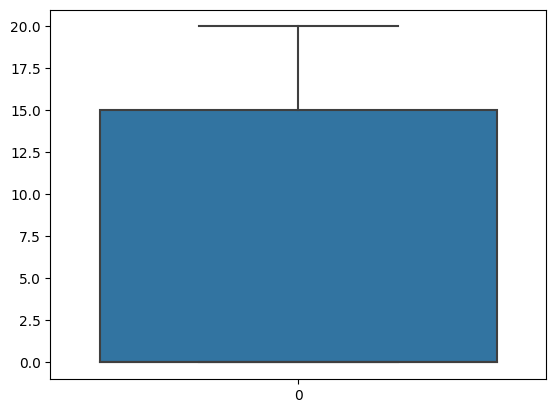

In [192]:
sns.boxplot(data=df['cigsPerDay'])

In [193]:
df.describe()

male          age  currentSmoker   cigsPerDay       BPMeds  \
count  3779.000000  3779.000000    3779.000000  3779.000000  3779.000000   
mean      0.385022    49.888859       0.432654     5.890712     0.030961   
std       0.486665     8.647703       0.495509     8.114060     0.173234   
min       0.000000    32.000000       0.000000     0.000000     0.000000   
25%       0.000000    42.000000       0.000000     0.000000     0.000000   
50%       0.000000    49.000000       0.000000     0.000000     0.000000   
75%       1.000000    57.000000       1.000000    15.000000     0.000000   
max       1.000000    70.000000       1.000000    20.000000     1.000000   

       prevalentStroke  prevalentHyp     diabetes      totChol        sysBP  \
count      3779.000000   3779.000000  3779.000000  3779.000000  3779.000000   
mean          0.006616      0.311723     0.026991   236.786187   132.494443   
std           0.081077      0.463259     0.162079    44.661924    22.366186   
min           0.000000      0.000000     0.000000   107.000000    83.500000   
25%           0.000000      0.000000     0.000000   206.000000   117.000000   
50%           0.000000      0.000000     0.000000   234.000000   128.000000   
75%           0.000000      1.000000     0.000000   263.000000   144.000000   
max           1.000000      1.000000     1.000000   696.000000   295.000000   

             diaBP          BMI    heartRate      glucose   TenYearCHD  
count  3779.000000  3779.000000  3779.000000  3779.000000  3779.000000  
mean     82.853268    25.788645    75.716062    82.242921     0.144747  
std      11.994042     4.106747    12.027984    23.238828     0.351892  
min      48.000000    15.540000    44.000000    40.000000     0.000000  
25%      74.500000    23.050000    68.000000    73.000000     0.000000  
50%      82.000000    25.340000    75.000000    80.000000     0.000000  
75%      89.500000    27.990000    82.000000    86.000000     0.000000  
max     142.500000    56.800000   143.000000   394.000000     1.000000

### Outliers for glucose

<AxesSubplot: >

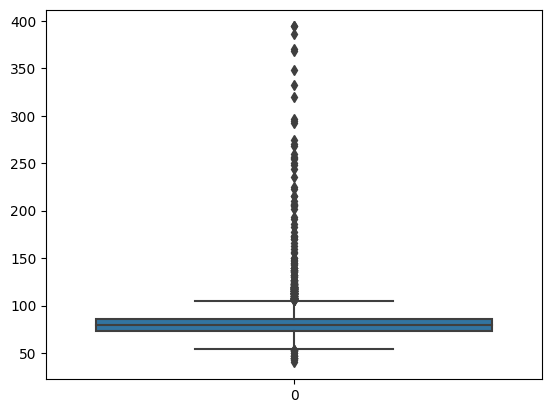

In [194]:
sns.boxplot(data=df['glucose'])

<AxesSubplot: >

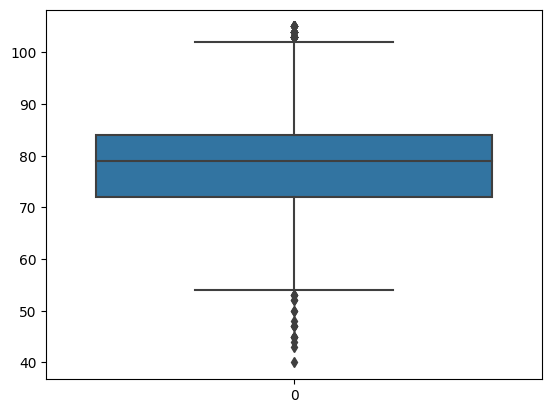

In [195]:
upper_boundary = df['glucose'].mean() + df['glucose'].std()
df = df.loc[df['glucose'] <= upper_boundary]
sns.boxplot(data=df['glucose'])

# Outliers for totChol

<AxesSubplot: >

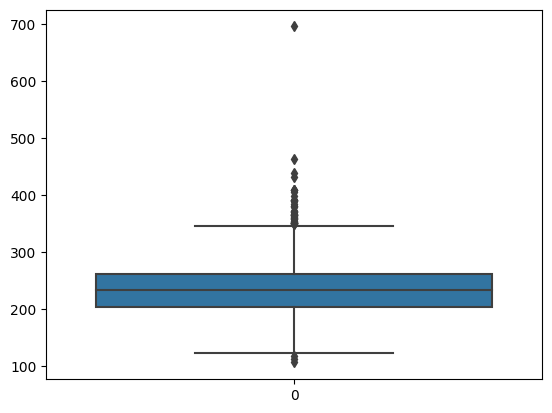

In [196]:
sns.boxplot(data=df['totChol'])

<AxesSubplot: >

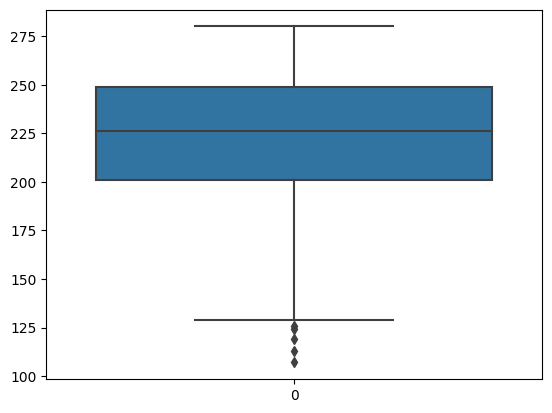

In [197]:
upper_boundary = df['totChol'].mean() + df['totChol'].std()
df = df.loc[df['totChol'] <= upper_boundary]
sns.boxplot(data=df['totChol'])

In [198]:
# Clearing Outliers by Age
ages = df['age'].unique()

for age in ages:
    df_age_median = df.loc[df['age'] == age].median()
    for key in df_age_median.keys():
        upper_boundary = df[key].quantile(q=0.75)
        df.loc[df['age'] == age & (df[key] <= upper_boundary)] = df_age_median[key]

In [199]:
# Exporting Clean CSV for webapp use
df.to_csv('clean_df.csv')

In [200]:
# Finding Median Values Given age
def medians_by_age(age, df):
    # Get Unique Values
    ages = df['age'].unique()
    ages.sort()

    closest_age = ages[0]
    # Perform binary search to find closest value
    l = 0
    r = len(ages) - 1
    while l <= r:
        m = (r + l)//2
        print(m, ages[m])
        if ages[m] == age:
            closest_age = ages[m]
            break
        
        if ages[m] > age:
            r = m - 1
        elif ages[m] < age:
            l = m + 1

    if l == len(ages):
        closest_age = ages[-1]
    else:
        closest_age = ages[l]
    
    # Filter Dataframe
    df_by_age = df.loc[df['age'] == closest_age]
    return df_by_age.median()

# Data Exploration

/Users/ferdz/Library/Python/3.9/lib/python/site-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


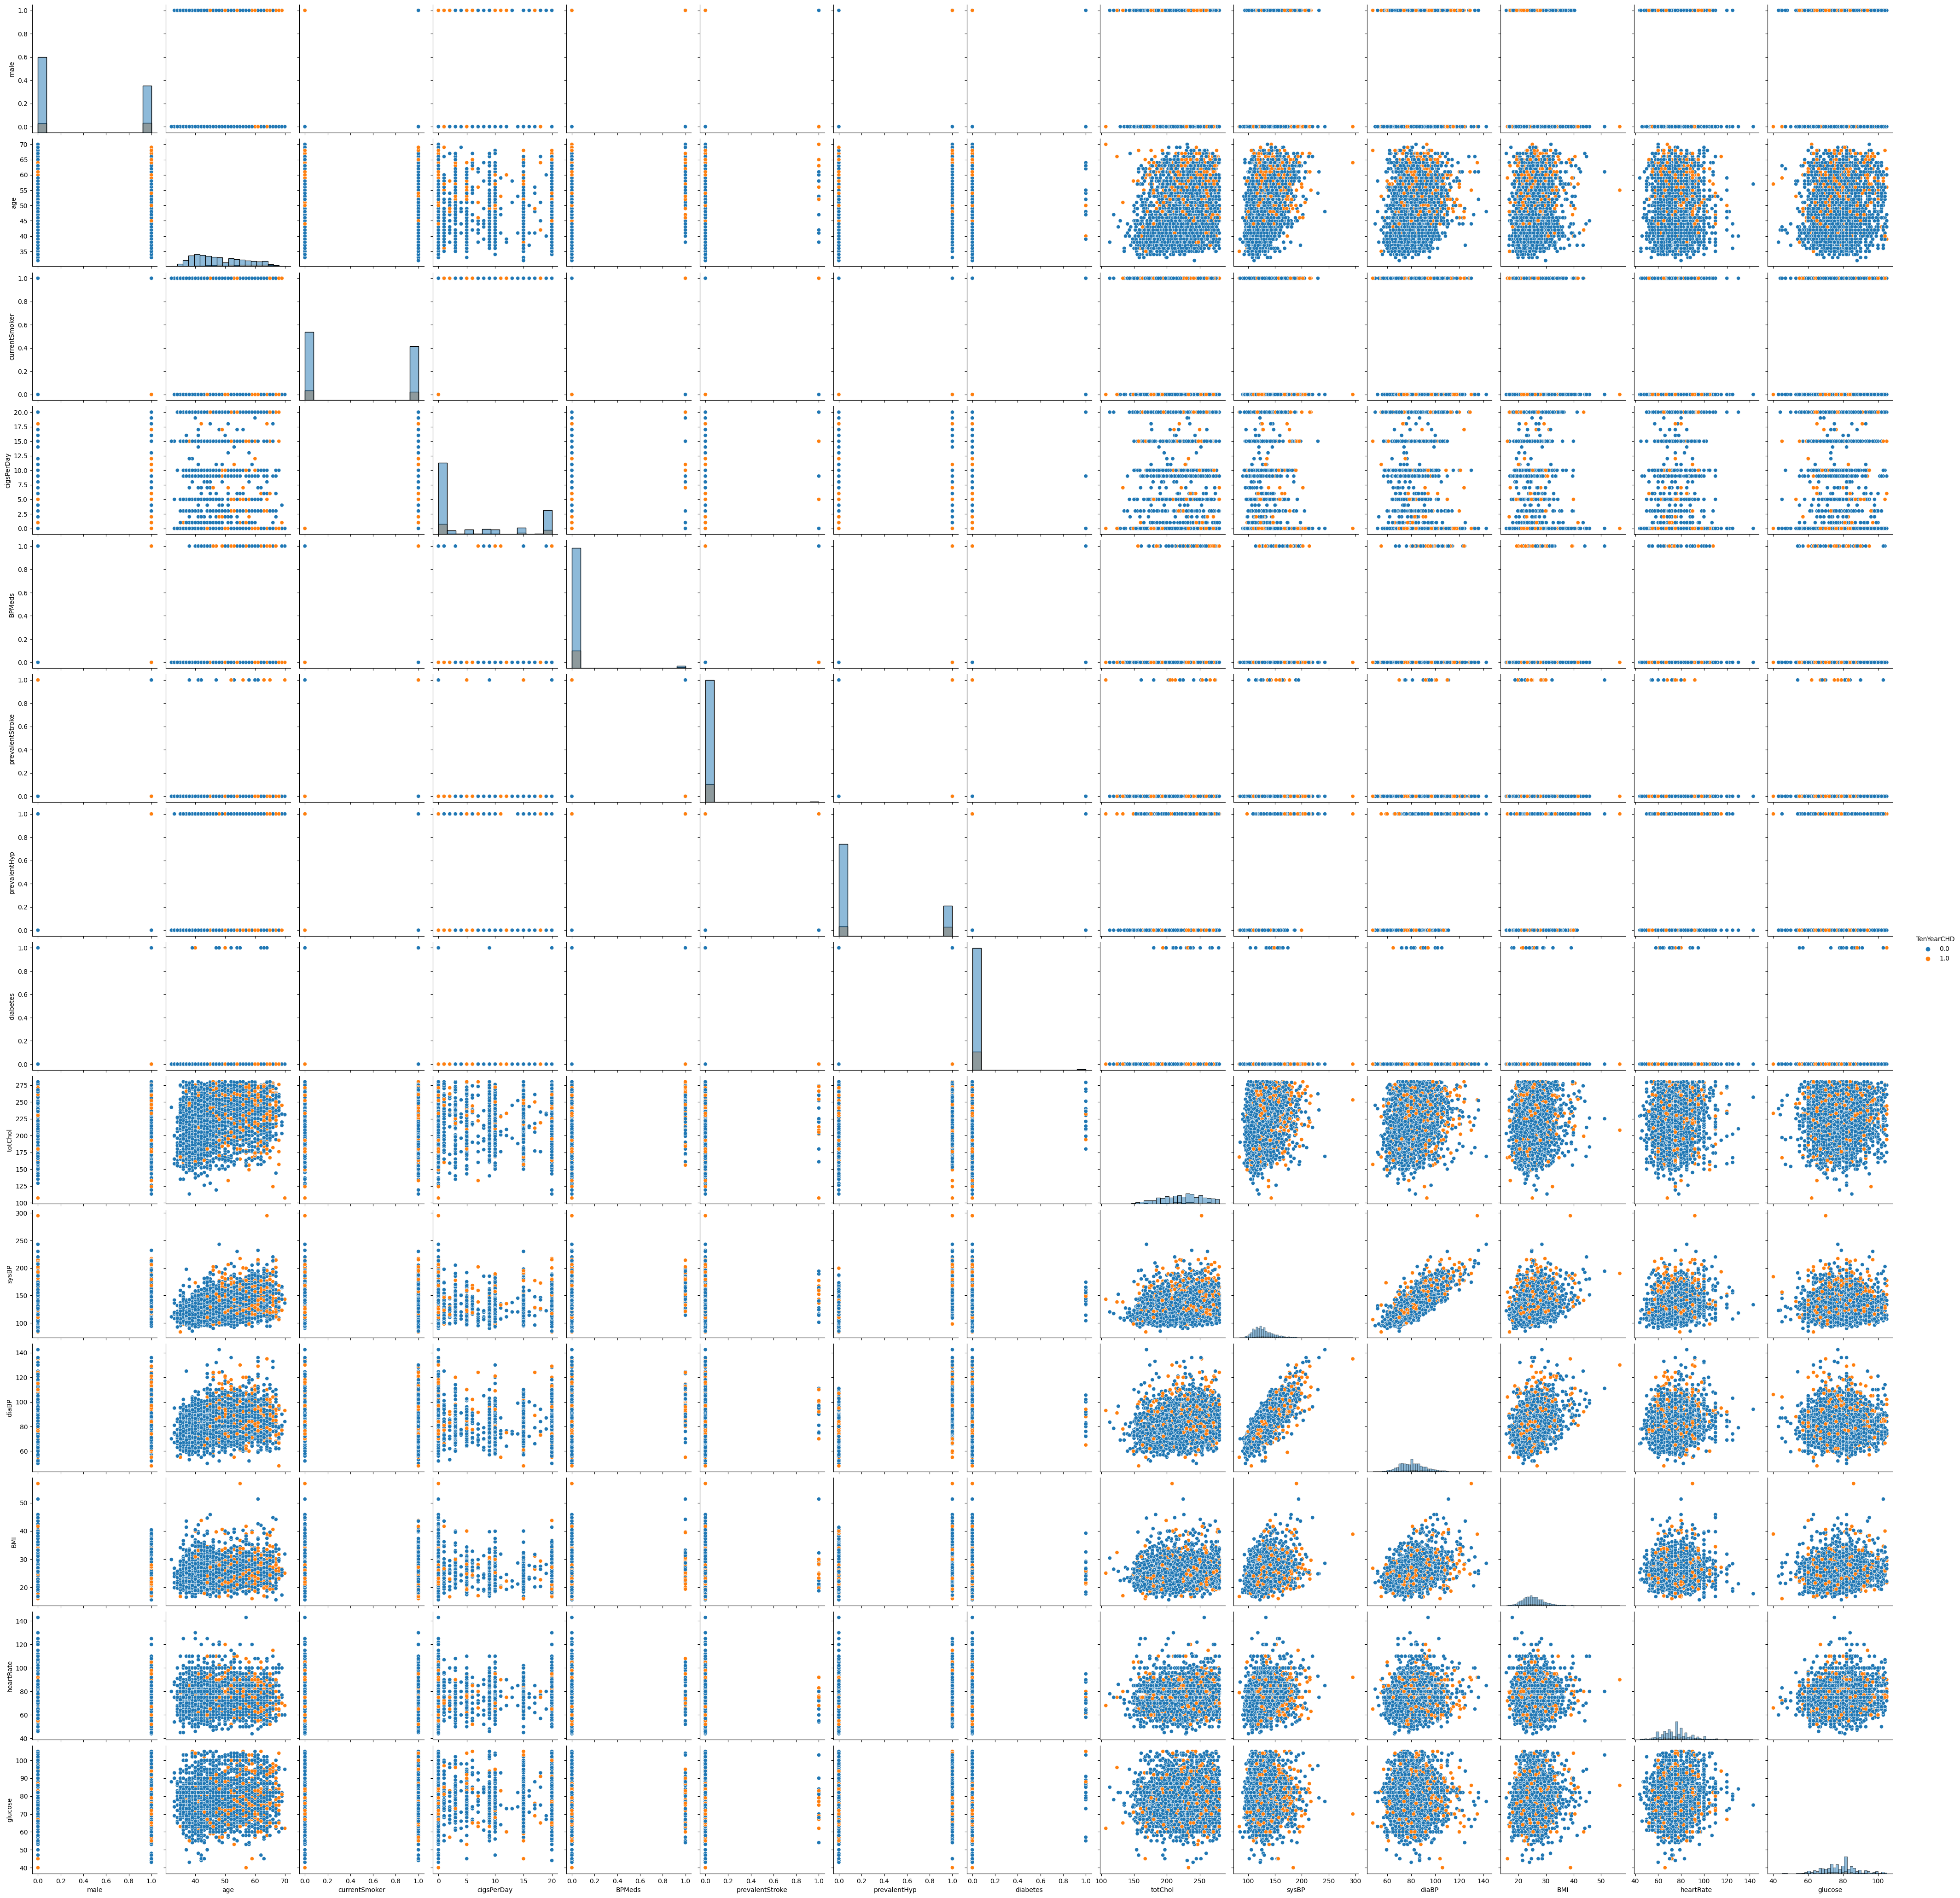

In [201]:
sns.pairplot(data=df, hue='TenYearCHD', size=3, diag_kind='hist')

Based on the pairplot above we can come up with a few points:
- As age increases, there is a higher chance that the person has history of heart disease

<AxesSubplot: >

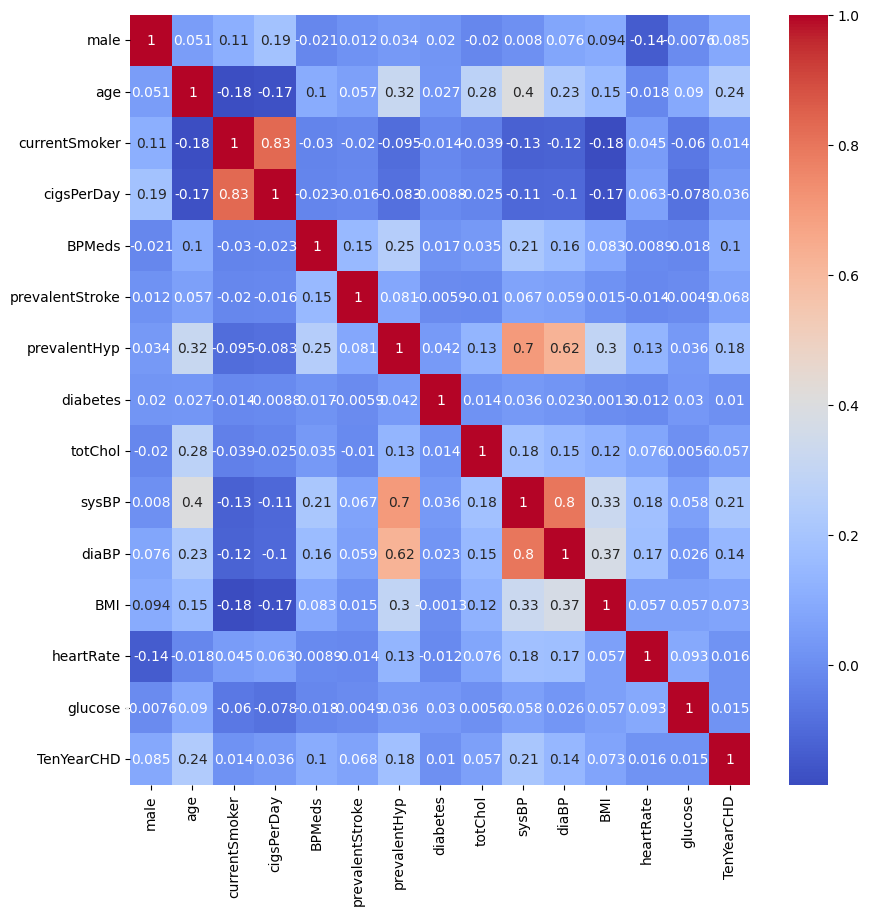

In [202]:
corr = df.corr()

fig, axs = plt.subplots(figsize=(10,10))
sns.heatmap(corr, annot=True, ax=axs, cmap='coolwarm')

In [216]:
from sklearn.model_selection import train_test_split

x = df.drop(columns=['TenYearCHD'])
y = df['TenYearCHD']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [220]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=5000)
model.fit(x_train, y_train)
# print metric to get performance
print("Accuracy:", model.score(x_test, y_test))

Accuracy: 0.8799126637554585


In [218]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(x_train, y_train)
# print metric to get performance
print("Accuracy:", model.score(x_test, y_test))

Accuracy: 0.8646288209606987


In [219]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_train, y_train)
# print metric to get performance
print("Accuracy:", model.score(x_test, y_test))

Accuracy: 0.7707423580786026


# Exporting the model

In [221]:
import pickle

pickle.dump(model, open('model.pkl', 'wb'))

# Loading the Model

In [208]:
pickled_model = pickle.load(open('model.pkl', 'rb'))


In [209]:
x_train.head()

male   age  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
676    0.0  48.0            0.0         0.0     0.0              0.0   
3306   1.0  56.0            0.0         0.0     0.0              0.0   
2591   0.0  42.0            1.0        15.0     0.0              0.0   
3759   0.0  55.0            0.0         0.0     0.0              0.0   
1953   1.0  46.0            0.0         0.0     0.0              0.0   

      prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  
676            0.0       0.0    240.0  119.0   80.0  31.67       60.0     79.0  
3306           0.0       0.0    193.0  114.0   80.0  28.41       60.0     88.0  
2591           0.0       0.0    216.0  119.0   75.0  27.01       70.0     73.0  
3759           1.0       0.0    262.0  122.5   84.0  28.68       66.0     76.0  
1953           0.0       0.0    222.0  120.5   73.5  27.23       77.0     60.0

In [210]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2135 entries, 676 to 2322
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             2135 non-null   float64
 1   age              2135 non-null   float64
 2   currentSmoker    2135 non-null   float64
 3   cigsPerDay       2135 non-null   float64
 4   BPMeds           2135 non-null   float64
 5   prevalentStroke  2135 non-null   float64
 6   prevalentHyp     2135 non-null   float64
 7   diabetes         2135 non-null   float64
 8   totChol          2135 non-null   float64
 9   sysBP            2135 non-null   float64
 10  diaBP            2135 non-null   float64
 11  BMI              2135 non-null   float64
 12  heartRate        2135 non-null   float64
 13  glucose          2135 non-null   float64
dtypes: float64(14)
memory usage: 250.2 KB


In [211]:
pickled_model.predict([[1, 64, 1, 20, 0, 0, 1, 0, 222, 141.5, 91, 27.06, 63, 75]])

/Users/ferdz/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0.])